In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape

(4600, 18)

price', 'total_sqft', 'bath', 'balcony

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## Data Preparation

In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
def detect_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)

    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers = pd.concat([outliers, column_outliers], axis=0)

    return outliers

# Memanggil fungsi untuk mendeteksi outlier dalam dataframe
outliers = detect_outliers(df)
print("Outliers:")
print(outliers)

Outliers:
                     date      price  bedrooms  bathrooms sqft_living  \
1     2014-05-02 00:00:00  2384000.0       5.0       2.50        3650   
11    2014-05-02 00:00:00  1400000.0       4.0       2.50        2920   
14    2014-05-02 00:00:00  1200000.0       5.0       2.75        2910   
99    2014-05-05 00:00:00  1395000.0       5.0       3.50        4010   
122   2014-05-05 00:00:00  2280000.0       7.0       8.00       13540   
...                   ...        ...       ...        ...         ...   
4385  2014-05-13 00:00:00        0.0       4.0       4.50        5030   
4398  2014-05-19 00:00:00   195000.0       5.0       3.75        5340   
4416  2014-05-23 00:00:00   316850.0       4.0       3.00        4060   
4524  2014-06-23 00:00:00   288500.0       5.0       2.50        3390   
4528  2014-06-24 00:00:00        0.0       4.0       5.00        4550   

     sqft_lot  floors waterfront view condition sqft_above sqft_basement  \
1        9050     2.0          0    4

<ipython-input-7-3a062ddc5ea0>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, column_outliers], axis=0)


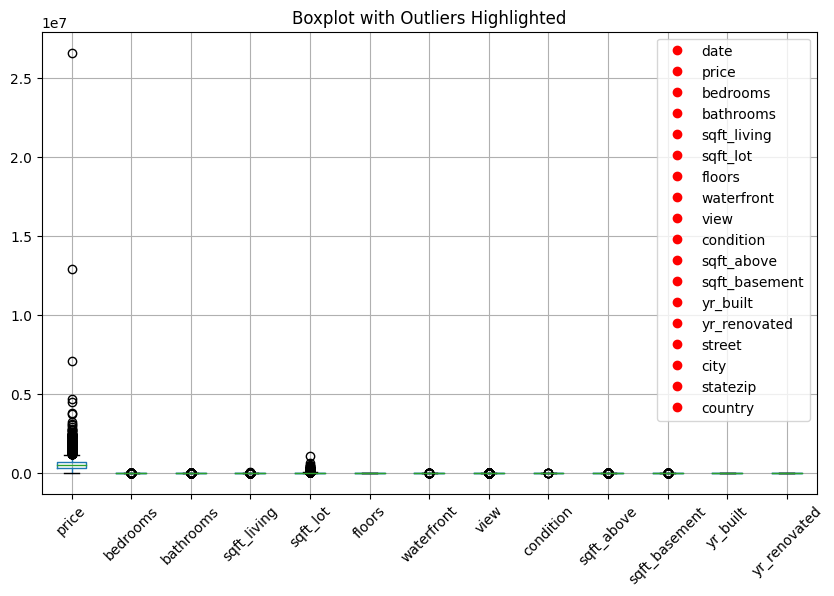

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot with Outliers Highlighted')
plt.xticks(rotation=45)

# Menyoroti outlier
for column in outliers.columns:
    plt.plot([], marker='o', linestyle='none', label=column, color='red')

plt.legend()
plt.show()

<ipython-input-9-d84b022a8b17>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, column_outliers], axis=0)
<ipython-input-9-d84b022a8b17>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, column_outliers], axis=0)


Outliers:
                     date      price  bedrooms  bathrooms sqft_living  \
1     2014-05-02 00:00:00  2384000.0       5.0       2.50        3650   
11    2014-05-02 00:00:00  1400000.0       4.0       2.50        2920   
14    2014-05-02 00:00:00  1200000.0       5.0       2.75        2910   
99    2014-05-05 00:00:00  1395000.0       5.0       3.50        4010   
122   2014-05-05 00:00:00  2280000.0       7.0       8.00       13540   
...                   ...        ...       ...        ...         ...   
4385  2014-05-13 00:00:00        0.0       4.0       4.50        5030   
4398  2014-05-19 00:00:00   195000.0       5.0       3.75        5340   
4416  2014-05-23 00:00:00   316850.0       4.0       3.00        4060   
4524  2014-06-23 00:00:00   288500.0       5.0       2.50        3390   
4528  2014-06-24 00:00:00        0.0       4.0       5.00        4550   

     sqft_lot  floors waterfront view condition sqft_above sqft_basement  \
1        9050     2.0          0    4

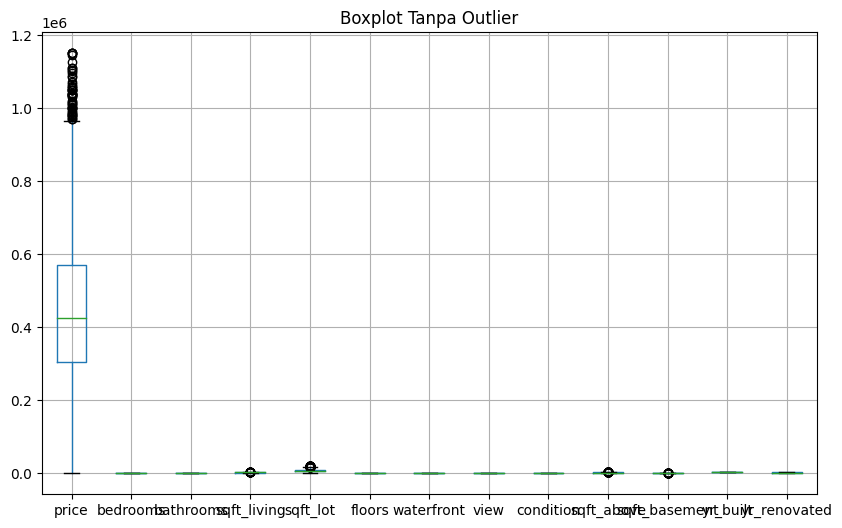

In [ ]:

def detect_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)

    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers = pd.concat([outliers, column_outliers], axis=0)

    return outliers

# Fungsi untuk menghapus outlier dari dataframe
def remove_outliers(df):
    outliers = detect_outliers(df)
    cleaned_df = df.drop(outliers.index)
    return cleaned_df

# Memanggil fungsi untuk mendeteksi outlier dalam dataframe
outliers = detect_outliers(df)
print("Outliers:")
print(outliers)

# Menghapus outlier dari dataframe
cleaned_df = remove_outliers(df)

# Visualisasi data tanpa outlier
plt.figure(figsize=(10, 6))
cleaned_df.boxplot()
plt.title("Boxplot Tanpa Outlier")
plt.show()

## EDA

<Axes: >

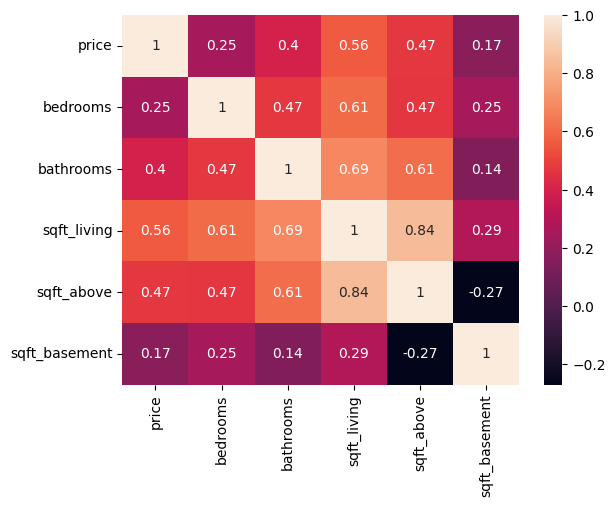

In [ ]:
sns.heatmap(cleaned_df[['price', 'bedrooms', 'bathrooms',
                        'sqft_living', 'sqft_above', 'sqft_basement']].corr(), annot=True)

### a. Distribution

Melihat distribusi data dari fitur yang akan digunakan, yaitu Price, sqft_living, sqft_above

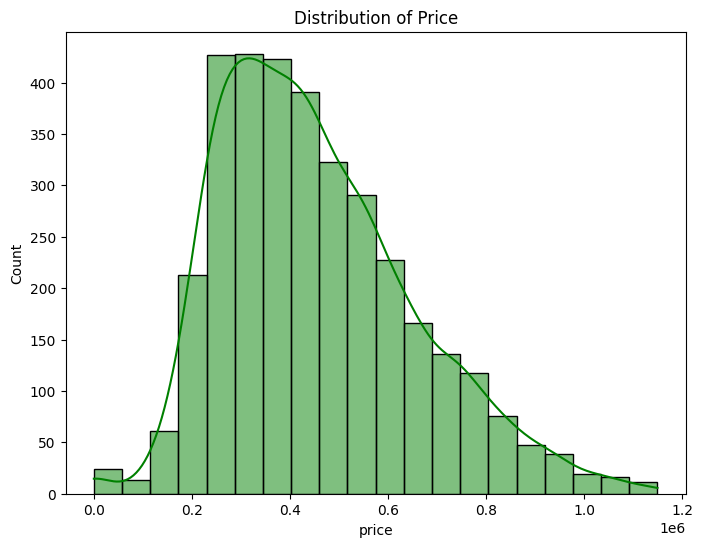

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['price'], bins=20, kde=True, color='green')
plt.title('Distribution of Price')
plt.show()

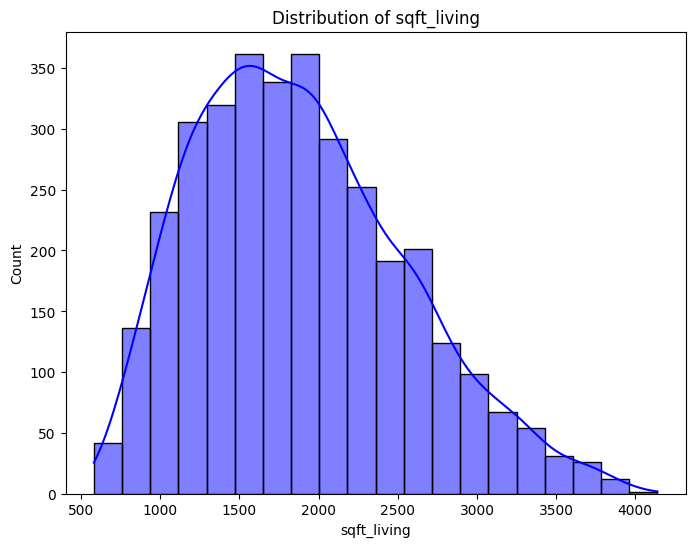

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['sqft_living'], bins=20, kde=True, color='blue')
plt.title('Distribution of sqft_living')
plt.show()

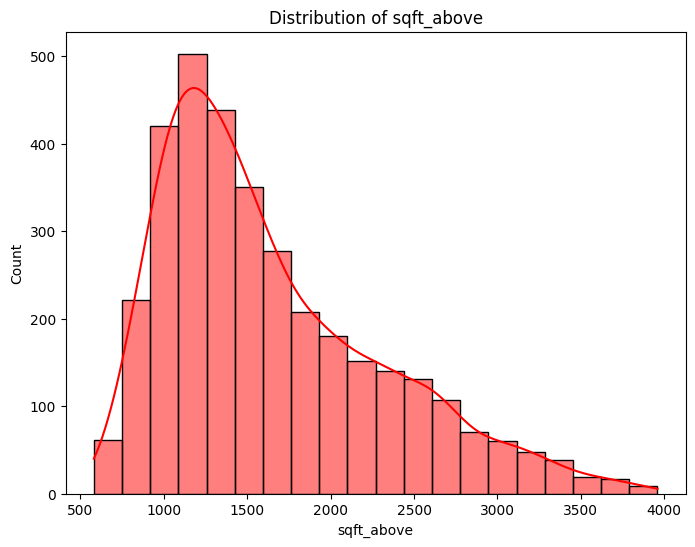

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['sqft_above'], bins=20, kde=True, color='red')
plt.title('Distribution of sqft_above')
plt.show()

#### b. Composition

In [ ]:
# Bining data terlebih dahulu
bins_price = [0.000000e+00, 2.000000e+05, 4.000000e+05, 6.500000e+05, 10.000000e+06]
labels_price = ['Murah', 'Standard', 'Menengah ke atas', 'Mewah']

# Binning pada kolom 'kategori'
cleaned_df['kategori'] = pd.cut(cleaned_df['price'], bins=bins_price, labels=labels_price)
cleaned_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,kategori
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,Standard
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,Standard
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,Menengah ke atas
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,Menengah ke atas
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,Menengah ke atas
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,Standard
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,Menengah ke atas
10,2014-05-02 00:00:00,463000.0,3.0,1.75,1710,7320,1.0,0,0,3,1710,0,1948,1994,Burke-Gilman Trail,Lake Forest Park,WA 98155,USA,Menengah ke atas
12,2014-05-02 00:00:00,588500.0,3.0,1.75,2330,14892,1.0,0,0,3,1970,360,1980,0,1833 220th Pl NE,Sammamish,WA 98074,USA,Menengah ke atas
13,2014-05-02 00:00:00,365000.0,3.0,1.00,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA,Standard


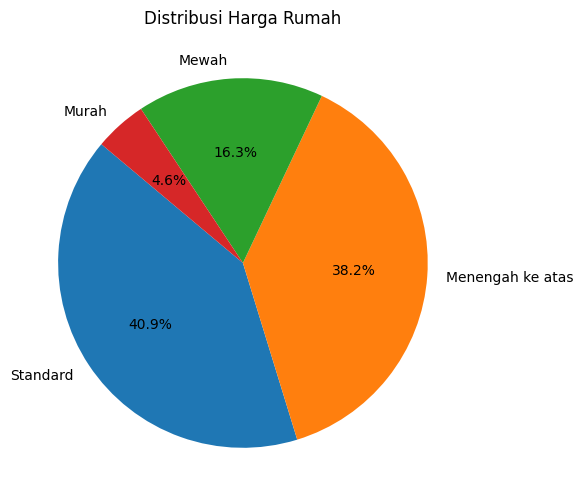

In [ ]:
price_distribution = cleaned_df['kategori'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Harga Rumah')
plt.show()

#### c. Relationship

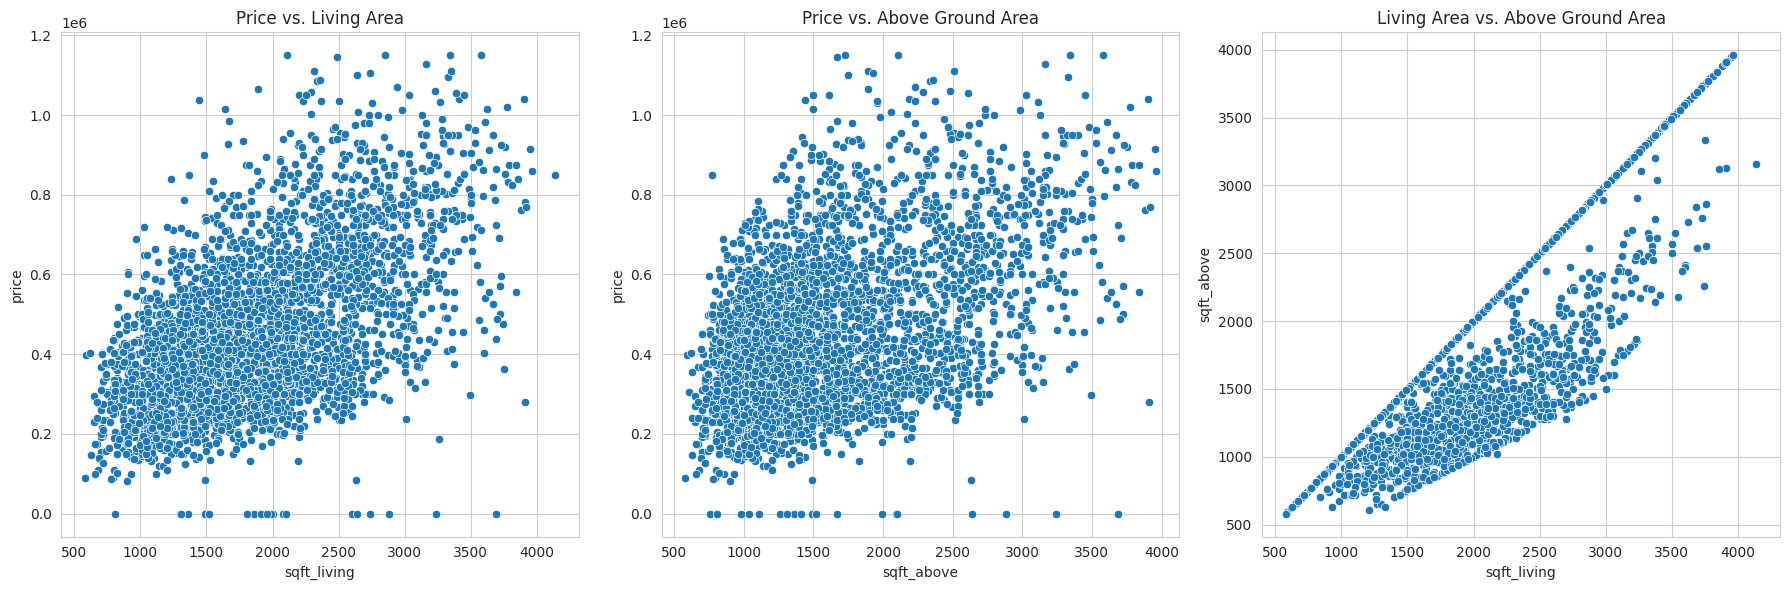

In [ ]:
cleaned_df.columns.tolist()
sns.set_style("whitegrid")

# Create scatter plots for the specified relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Relationship between price and sqft_living
sns.scatterplot(ax=axes[0], data=cleaned_df, x='sqft_living',
                y='price').set_title('Price vs. Living Area')

# Relationship between price and sqft_above
sns.scatterplot(ax=axes[1], data=cleaned_df, x='sqft_above',
                y='price').set_title('Price vs. Above Ground Area')

# Relationship between sqft_living and sqft_above
sns.scatterplot(ax=axes[2], data=cleaned_df, x='sqft_living',
                y='sqft_above').set_title('Living Area vs. Above Ground Area')

plt.tight_layout()
plt.show()

#### d. Comparison

<Figure size 1500x800 with 0 Axes>

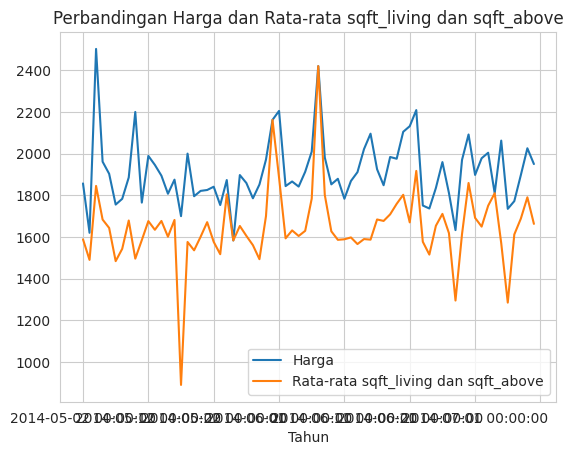

In [ ]:
Comparison1 = cleaned_df.groupby('date')[['sqft_living','sqft_above']].mean()

plt.figure(figsize=(15, 8))
Comparison1.plot(kind='line')
plt.title('Perbandingan Harga dan Rata-rata sqft_living dan sqft_above')
plt.xlabel('Tahun')
plt.legend(["Harga", "Rata-rata sqft_living dan sqft_above"])
plt.show()


In [ ]:
cleaned_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,kategori
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,Standard
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,Standard
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,Menengah ke atas
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,Menengah ke atas
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,Menengah ke atas


In [ ]:
df1 = cleaned_df.copy()

# Mengubah kolom 'date' menjadi tipe data datetime
df1['date'] = pd.to_datetime(cleaned_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day
df1['time'] = df1['date'].dt.time
df1 = df1.loc[:,['date', 'year', 'month', 'day', 'time', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'city', 'kategori']]
df1.tail(10)

,date,year,month,day,time,price,bedrooms,bathrooms,sqft_living,city,kategori
4590,2014-07-08,2014,7,8,00:00:00,380680.555556,4.0,2.50,2620,Renton,Standard
4591,2014-07-08,2014,7,8,00:00:00,396166.666667,3.0,1.75,1880,Seattle,Standard
4592,2014-07-08,2014,7,8,00:00:00,252980.000000,4.0,2.50,2530,Federal Way,Standard
4593,2014-07-08,2014,7,8,00:00:00,289373.307692,3.0,2.50,2538,Auburn,Standard
4594,2014-07-09,2014,7,9,00:00:00,210614.285714,3.0,2.50,1610,Kent,Standard
4595,2014-07-09,2014,7,9,00:00:00,308166.666667,3.0,1.75,1510,Seattle,Standard
4596,2014-07-09,2014,7,9,00:00:00,534333.333333,3.0,2.50,1460,Bellevue,Menengah ke atas
4597,2014-07-09,2014,7,9,00:00:00,416904.166667,3.0,2.50,3010,Renton,Menengah ke atas
4598,2014-07-10,2014,7,10,00:00:00,203400.000000,4.0,2.00,2090,Seattle,Standard
4599,2014-07-10,2014,7,10,00:00:00,220600.000000,3.0,2.50,1490,Covington,Standard


### Machine Learning: Multiple Linear Regression

#### Pemilihan X dan Y

In [ ]:
X = cleaned_df[['bedrooms', 'bathrooms', 'sqft_living']]
y = cleaned_df['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.32137014863557534

<li> Koefisien untuk fitur 'bedrooms' adalah -33763.63974034 </li>
<li> Koefisien untuk fitur 'bathrooms' adalah 7008.7901624 </li>
<li> Koefisien untuk fitur 'sqft_living' adalah 184.7131315 </li>
Intersep dari garis regresi adalah 202241.3990871276.


Ini berarti bahwa:

<li> Setiap penambahan satu kamar tidur (bedrooms) dalam rumah dikaitkan dengan penurunan rata-rata '33763.64 AUD' dalam harga rumah, jika faktor lainnya tetap. </li>
<li> Setiap penambahan satu kamar mandi (bathrooms) dikaitkan dengan peningkatan rata-rata '7008.79 AUD' dalam harga rumah, jika faktor lainnya tetap. </li>
<li> Setiap penambahan satu kaki persegi ruang tamu (sqft_living) dikaitkan dengan peningkatan rata-rata '184.71 AUD' dalam harga rumah, jika faktor lainnya tetap. </li>

In [ ]:
# Misalnya, 3% kenaikan per tahun
annual_increase_percentage = 0.03

# Define the years you want to predict
years_to_predict = [2025, 2026, 2027, 2028, 2029]

# Lakukan prediksi harga rumah untuk tahun-tahun yang diinginkan
predicted_prices = []
current_price = cleaned_df['price'].iloc[-1]  # Ambil harga rumah terbaru dari data historis
for year in years_to_predict:
    predicted_price = current_price * (1 + annual_increase_percentage) ** (year - years_to_predict[0])
    predicted_prices.append(predicted_price)

# Tampilkan hasil prediksi
for year, price in zip(years_to_predict, predicted_prices):
    print(f"Prediksi harga rumah untuk tahun {year}: ${price:.2f}")


Prediksi harga rumah untuk tahun 2025: $220600.00
Prediksi harga rumah untuk tahun 2026: $227218.00
Prediksi harga rumah untuk tahun 2027: $234034.54
Prediksi harga rumah untuk tahun 2028: $241055.58
Prediksi harga rumah untuk tahun 2029: $248287.24


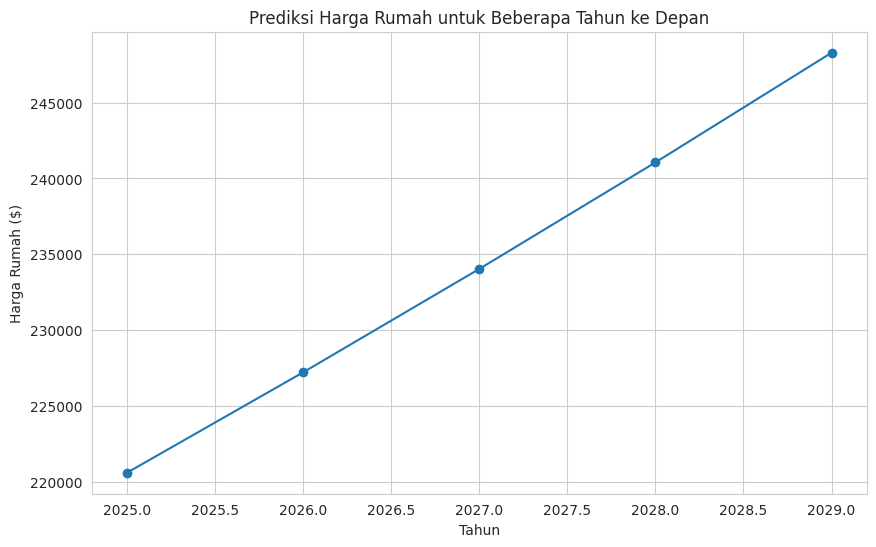

In [ ]:
import matplotlib.pyplot as plt

# Tampilkan hasil prediksi dalam grafik garis
plt.figure(figsize=(10, 6))
plt.plot(years_to_predict, predicted_prices, marker='o', linestyle='-')
plt.title('Prediksi Harga Rumah untuk Beberapa Tahun ke Depan')
plt.xlabel('Tahun')
plt.ylabel('Harga Rumah ($)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np  # Import numpy library
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi harga menggunakan model
predicted_prices = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_prices)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_prices)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  # Use np.sqrt for square root calculation
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2) Score
r2 = r2_score(y_test, predicted_prices)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 126899.64949813002
Mean Squared Error (MSE): 24987622026.85732
Root Mean Squared Error (RMSE): 158074.73557421286
R-squared (R2) Score: 0.36193840020352164


## Model 2:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Function to create Z-Score
def make_mi_score(x,y):
    x = x.copy()
    for colname in x.select_dtypes(['object','category']):
        x[colname], _ = x[colname].factorize()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    mi_score = mutual_info_regression(x, y, discrete_features=discrete_features, random_state=42)
    mi_score = pd.Series(mi_score, name='Mutual Information Score', index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [ ]:
X = df.drop(columns=['price'])
y = df[['price']]

mi_score = make_mi_score(X, y)
mi_score

,Mutual Information Score
street,1.187259
statezip,0.453802
city,0.315389
sqft_living,0.298434
sqft_above,0.200396
bathrooms,0.184815
sqft_lot,0.145104
bedrooms,0.080524
yr_built,0.075527
floors,0.053934


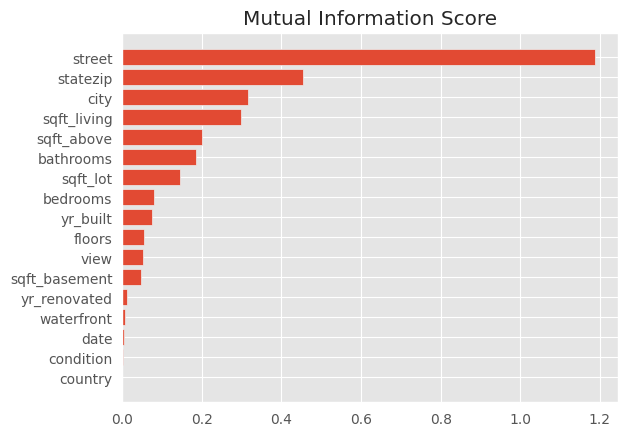

In [ ]:
def plot_mi_score(score):
    score = score.sort_values(ascending = True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width,score)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Score')

plot_mi_score(mi_score)

In [ ]:
# Refining the dataset based on mutual information score
df = df[['street','statezip','city','sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms']]

In [ ]:
df

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,1955,7912,3.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,1921,9050,5.0
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,1966,11947,3.0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,1963,8030,3.0
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,1976,10500,4.0
...,...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,1954,6360,3.0
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,1983,7573,3.0
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,2009,7014,3.0
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,1974,6630,4.0


In [ ]:
df = df.join(y)

### Removing Outliers with Z-Score

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(dfmod[['sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms']]))
print(z)

      sqft_living  sqft_above  bathrooms  yr_built  sqft_lot  bedrooms
0        0.829971    0.565224   0.843204  0.531014  0.193434  0.441122
1        1.568528    1.789559   0.432802  1.674693  0.161718  1.759705
2        0.217367    0.119171   0.205201  0.161000  0.080978  0.441122
3        0.144686    0.959621   0.113800  0.261913  0.190145  0.441122
4        0.206984    0.797222   0.432802  0.175376  0.121306  0.659291
...           ...         ...        ...       ...       ...       ...
4595     0.653458    0.368025   0.524202  0.564651  0.236689  0.441122
4596     0.705374    0.426025   0.432802  0.410840  0.202882  0.441122
4597     0.904009    1.371962   0.432802  1.285418  0.218462  0.441122
4598     0.051238    0.878421   0.205201  0.108101  0.229164  0.659291
4599     0.674224    0.391225   0.432802  0.646303  0.188139  0.441122

[4600 rows x 6 columns]


In [ ]:
threshold = 3
print(np.where(z > 3))

In [ ]:
df = df[(z < 3).all(axis=1)]

In [ ]:
dfmod.head()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
!pip install category_encoders


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder



In [ ]:
import pandas as pd

# Assuming y is a pandas Series
# Convert y to numeric type, ignoring errors
y_numeric = pd.to_numeric(y, errors='coerce')

# Drop rows where conversion to numeric failed
X = X[y_numeric.notnull()]
y = y_numeric[y_numeric.notnull()]

# Now, you can use MEstimateEncoder
encoder = MEstimateEncoder(cols=['street', 'statezip', 'city'], m=0.5)
X_encoded = encoder.fit_transform(X, y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)